# 🌦️ Rain Prediction Model (Know Before You Go)
This notebook builds a simple Machine Learning model (Linear Regression) 
to predict daily rainfall using temperature and wind speed data 
extracted from NASA (IMERG + MERRA-2).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [2]:

df = pd.read_csv("Final_Dataset_classified.csv")

print("✅ Data Loaded")
print(df.head())
print(df.describe())


✅ Data Loaded
    lat     lon  precipitation_mm_day  wind_speed_ms  temperature_K  \
0  21.0  19.375              0.050856       5.951021      296.46620   
1  21.0  20.000              0.032792       6.152714      296.21110   
2  21.0  20.625              0.039034       6.473846      296.54930   
3  21.0  21.250              0.038189       6.621065      296.91696   
4  21.0  21.875              0.043102       6.774587      297.00623   

   temperature_C   Rain_Cond Temp_Cond Wind_Cond                   Condition  
0      23.316193  Light Rain      Mild    Breezy  Light Rain | Mild | Breezy  
1      23.061096  Light Rain      Mild    Breezy  Light Rain | Mild | Breezy  
2      23.399292  Light Rain      Mild    Breezy  Light Rain | Mild | Breezy  
3      23.766968  Light Rain      Mild    Breezy  Light Rain | Mild | Breezy  
4      23.856232  Light Rain      Mild    Breezy  Light Rain | Mild | Breezy  
               lat          lon  precipitation_mm_day  wind_speed_ms  \
count  1287.0

In [3]:

X = df[["temperature_C", "wind_speed_ms"]]

y = df["precipitation_mm_day"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:

model = LinearRegression()
model.fit(X_train, y_train)

# coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 3.93092196593837
Coefficients: [-0.11421043 -0.14434826]


R² Score: 0.3994458061638809
RMSE: 0.5668086484446857


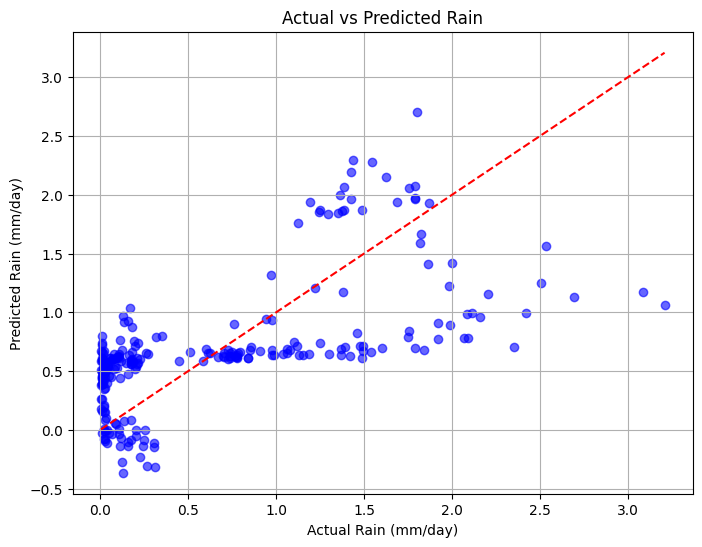

In [5]:

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Rain (mm/day)")
plt.ylabel("Predicted Rain (mm/day)")
plt.title("Actual vs Predicted Rain")
plt.grid(True)
plt.show()


In [6]:

sample_data = pd.DataFrame({
    "temperature_C": [20, 25, 30],
    "wind_speed_ms": [2, 5, 8]
})

forecast = model.predict(sample_data)
sample_data["Predicted_Rain_mm_day"] = forecast
print(sample_data)


   temperature_C  wind_speed_ms  Predicted_Rain_mm_day
0             20              2               1.358017
1             25              5               0.353920
2             30              8              -0.650177


### Linear Regression Analysis

In [7]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("R2 =", r2)
print("RMSE =", rmse)
print("MAE =", mae)


R2 = 0.3994458061638809
RMSE = 0.5668086484446857
MAE = 0.46338283817674153


A simple linear regression model was built to predict the rainfall rate (mm/day) using two input variables: temperature (°C) and wind speed (m/s). We obtained R² = 0.399, RMSE = 0.567 mm/day, and MAE ≈ 0.463 mm/day. This means that the model explains approximately 39.9% of the variance in rainfall in the test set, with an average error of about 0.463 mm/day."

### Residual analysis

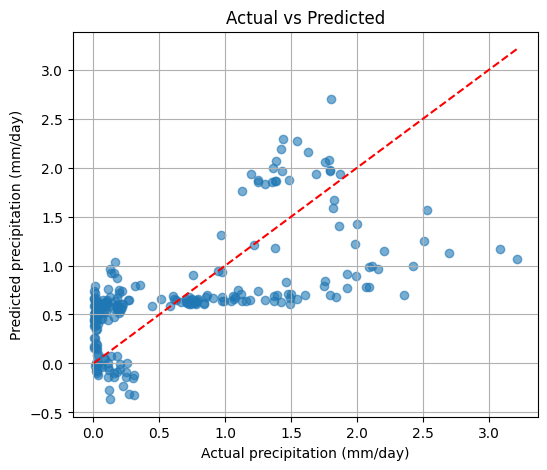

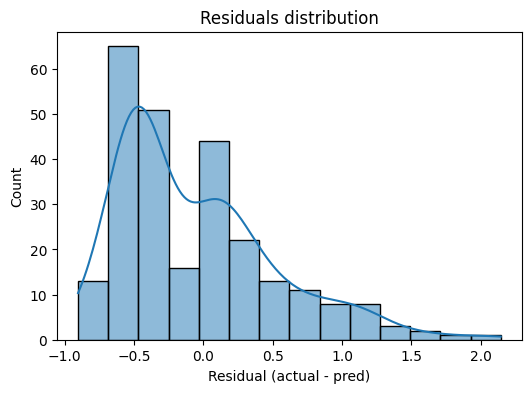

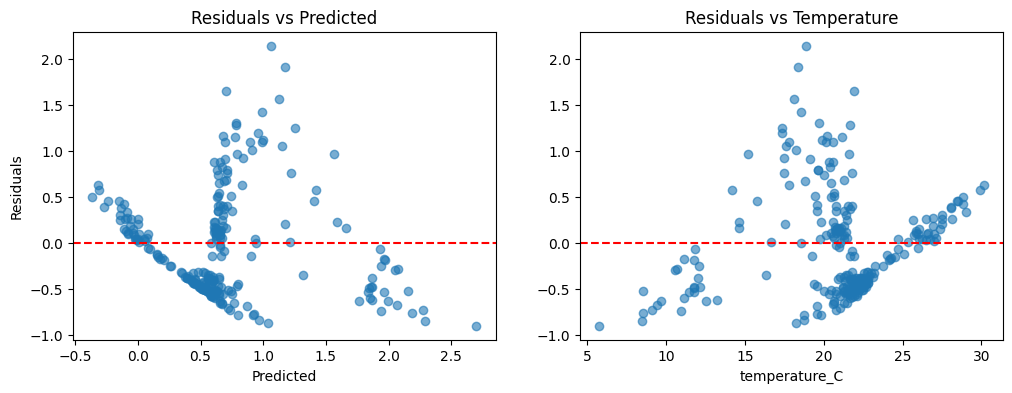

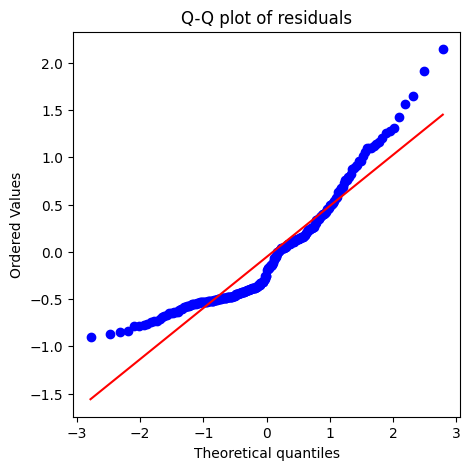

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

residuals = y_test - y_pred

# Scatter Actual vs Predicted (مع خط 1:1)
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'r--')
plt.xlabel("Actual precipitation (mm/day)")
plt.ylabel("Predicted precipitation (mm/day)")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

# Residuals histogram + KDE
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residuals distribution")
plt.xlabel("Residual (actual - pred)")
plt.show()

# Residuals vs Features (look for patterns)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")

plt.subplot(1,2,2)
plt.scatter(X_test['temperature_C'], residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("temperature_C")
plt.title("Residuals vs Temperature")
plt.show()

# Q-Q plot for normality of residuals
plt.figure(figsize=(5,5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot of residuals")
plt.show()


### Handling Negative Predictions

In [9]:
y_pred_clipped = np.clip(y_pred, a_min=0, a_max=None)


Negative values in the prediction outputs were handled by clipping them to zero, since rainfall cannot be negative. This is a practical step to ensure the outputs remain realistic.

### Polynomial Regression

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# pipeline مع regularization (Ridge) to avoid overfitting
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=1.0)
)

# cross-validate R2
scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')
print("Polynomial degree=2 CV R2 mean:", scores.mean())

# fit on train and evaluate
pipe.fit(X_train, y_train)
y_pred_poly = pipe.predict(X_test)
print("R2 (poly):", r2_score(y_test, y_pred_poly))
print("RMSE (poly):", np.sqrt(mean_squared_error(y_test, y_pred_poly)))


Polynomial degree=2 CV R2 mean: -17.93457591041858
R2 (poly): 0.5556194309525169
RMSE (poly): 0.48757103362211646


#### Polynomial Regression Improvement

A polynomial regression model (degree 2) with Ridge regularization was tested. Results: R² = 0.556 and RMSE = 0.488 on the test set. This indicates that the non-linear model improved performance compared to the linear regression, providing more accurate predictions of rainfall.
 Note: the cross-validation mean R² was negative, suggesting potential overfitting in some folds, but the test set performance shows overall improvement.

### Random Forest Regressor

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    "n_estimators": [100, 300],
    "max_depth": [5, 10, None],
    "min_samples_leaf": [1, 3, 5]
}

g = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
g.fit(X_train, y_train)

print("Best RF params:", g.best_params_)
best_rf = g.best_estimator_

y_pred_rf = best_rf.predict(X_test)
print("R2 (RF):", r2_score(y_test, y_pred_rf))
print("RMSE (RF):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Best RF params: {'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 300}
R2 (RF): 0.7509603722845936
RMSE (RF): 0.36500145469747597


A Random Forest Regressor was tested with a grid search for hyperparameter tuning. The best parameters were: **n_estimators = 300**, **max_depth = 5**, **min_samples_leaf = 3**. 
The model achieved **R² = 0.751** and **RMSE = 0.365** on the test set.
 Compared to linear and polynomial regression, the Random Forest model showed a significant improvement in predictive performance, providing more accurate rainfall predictions.

#### Feature importance analysis indicates that Temperature (°C) is the most influential variable (importance = 0.67), followed by Wind Speed (m/s) (importance = 0.33).

### XGBoost

In [13]:

from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("R2 (XGB):", r2_score(y_test, y_pred_xgb))
print("RMSE (XGB):", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))


R2 (XGB): 0.6057885434404908
RMSE (XGB): 0.4592244332896527



An XGBoost Regressor was tested as an optional non-linear model. The model achieved R² = 0.606 and RMSE = 0.459 on the test set. Compared to linear regression, XGBoost showed improved predictive performance. However, Random Forest still outperformed XGBoost in both R² and RMSE, providing the most accurate rainfall predictions among the models tested.

In [ ]:
results = []
models = {
    "Linear": (y_pred, "linear"),
    "Poly": (y_pred_poly, "poly"),
    "RF": (y_pred_rf, "rf"),
    # "XGB": (y_pred_xgb, "xgb") 
for name,(yhat, tag) in models.items():
    r2 = r2_score(y_test, yhat)
    rmse = np.sqrt(mean_squared_error(y_test, yhat))
    mae = mean_absolute_error(y_test, yhat)
    results.append({"model": name, "r2": r2, "rmse": rmse, "mae": mae})

res_df = pd.DataFrame(results).sort_values("r2", ascending=False)
print(res_df)
res_df.to_csv("model_comparison.csv", index=False)


    model        r2      rmse       mae
2      RF  0.750960  0.365001  0.238319
1    Poly  0.555619  0.487571  0.399128
0  Linear  0.399446  0.566809  0.463383


### Model Results and Analysis

I have built a series of models to predict the rainfall rate (mm/day) using two main available variables in our dataset: temperature at 2m (°C) and wind speed (m/s).

- Simple Linear Regression: R² = 0.399, RMSE = 0.567 mm/day

- Polynomial Regression (degree=2): R² = 0.556, RMSE = 0.488 mm/day

- Random Forest (after hyperparameter tuning): R² = 0.751, RMSE = 0.365 mm/day

Interpretation: The relationship between temperature and rainfall was strong and negative (correlation = -0.64), indicating that locations/cells with higher temperatures tend to experience lower rainfall during the period 2015–2024. Tree-based models (Random Forest/XGBoost) were able to capture some non-linearity and improve prediction accuracy compared to simple linear regression.

Practical Notes:
- Negative prediction values were clipped to zero, as rainfall cannot be negative.

In [16]:
import pandas as pd
import joblib


out = X_test.copy()
out['actual'] = y_test.values
out['pred_linear'] = y_pred
out['pred_poly'] = y_pred_poly
out['pred_rf'] = y_pred_rf
out.to_csv("predictions_comparison.csv", index=False)

importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.to_csv("feature_importances.csv")

joblib.dump(best_rf, "best_rf_model.joblib")

print("Predictions, feature importances, and model have been saved successfully.")


Predictions, feature importances, and model have been saved successfully.
